# Project 1
DSND Term 2 <br> <br>
09/13/2020
***

### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#from seaborn import regplot
#from statsmodels.graphics.gofplots import qqplot
#import statsmodels.api as sm
#from scipy.stats import t as tstat

#import seaborn as sns

import time
import os

#import matplotlib.patches as mpatches
#from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler
#from sklearn.preprocessing import OneHotEncoder #finally not used
#from sklearn.decomposition import PCA
#from sklearn.decomposition import FastICA #finally not used
#from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

# to produce visualizations in notebook:
%matplotlib inline

os.chdir('/Users/erekasi/Documents/DA/002_DSND_Term-2/Project 1')
start_full = time.time()

### Loading the data

In [2]:
# Seattle datasets
dfs_cal=pd.read_csv('calendar_seattle.csv')
dfs_lis=pd.read_csv('listings_seattle.csv')
dfs_rev=pd.read_csv('reviews_seattle.csv')

In [3]:
# Boston datasets
dfb_cal=pd.read_csv('calendar_boston.csv')
dfb_lis=pd.read_csv('listings_boston.csv')
dfb_rev=pd.read_csv('reviews_boston.csv')

### Data understanding

#### Size of the datasets

In [4]:
#Size of the datasets
print('Shape of calendar data on Seattle and Boston(rows, columns): ', dfs_cal.shape, ' & ', dfb_cal.shape)
print('Shape of listings data on Seattle and Boston(rows, columns): ', dfs_lis.shape, ' & ', dfb_lis.shape)
print('Shape of reviews data on Seattle and Boston(rows, columns): ', dfs_rev.shape, ' & ', dfb_rev.shape)

Shape of calendar data on Seattle and Boston(rows, columns):  (1393570, 4)  &  (1308890, 4)
Shape of listings data on Seattle and Boston(rows, columns):  (3818, 92)  &  (3585, 95)
Shape of reviews data on Seattle and Boston(rows, columns):  (84849, 6)  &  (68275, 6)


> __Finding__:<br>
Boston listings contains 3 more columns than Seattle's


In [5]:
#Check the difference in columns between the Boston and the Seattle listings datasets

dfs_lis_cols = set(dfs_lis.columns)
#print(dfs_lis_cols)

dfb_lis_cols = set(dfb_lis.columns)
df_lis_dif = dfb_lis_cols - dfs_lis_cols
print('Features only covered in the Boston dataset: ', df_lis_dif)

Features only covered in the Boston dataset:  {'house_rules', 'access', 'interaction'}


In [6]:
# General information
dfb_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [7]:
#To see the full list of the listings datasets' features
dfb_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [8]:
dfs_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
dfb_rev.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


In [10]:
dfs_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [11]:
dfs_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
dfb_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


### Data preparation

In [13]:
#Drop columns from Boston listings which are missing from Seattle listings
dfb_lis = dfb_lis.drop(columns=['interaction', 'house_rules', 'access'])

In [14]:
dfb_lis.shape

(3585, 92)

In [15]:
#Rename some columns to enable merging
dfs_lis = dfs_lis.rename(columns={'id':'listing_id'})
dfb_lis = dfb_lis.rename(columns={'id':'listing_id'})

In [16]:
#Merge listings and calendar datasets
start = time.time()

dfs = pd.merge(dfs_lis, dfs_cal, how = 'outer')
dfb = pd.merge(dfb_lis, dfb_cal, how = 'outer')

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 48.16 second(s)


In [22]:
dfs.shape[0]

1393858

In [ ]:
dfb.shape[0]

In [17]:
#Add a city column to differentiate records by city in the concatenated dataset
dfs['seattle'] = 1
dfb['seattle'] = 0

In [18]:
#Join Seattle and Boston datasets

start = time.time()

df = pd.concat([dfs, dfb])
end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 30.33 second(s)


In [23]:
print('Proportion of Seattle data in the complete dataset:')
dfs.shape[0]/df.shape[0]

Proportion of Seattle data in the complete dataset:


0.5154754543598725

In [24]:
print('Proportion of Boston data in the complete dataset:')
dfb.shape[0]/df.shape[0]

Proportion of Boston data in the complete dataset:


0.4845245456401275

In [20]:
df.columns.sort_values()

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'available', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'date',
       'description', 'experiences_offered', 'extra_people', 'first_review',
       'guests_included', 'has_availability', 'host_about',
       'host_acceptance_rate', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'instant_bookable', 'is_location_exact',
       'jurisdiction_names', 'last_review', 'last_scraped', 'latitude',
    

#### Assessing missing data

In [25]:
dfs_mis = pd.DataFrame(np.sum(dfs.isnull())/dfs.shape[0])

In [26]:
dfs_mis.head(3)

,0
listing_id,0.000000
listing_url,0.510162
scrape_id,0.510162


In [27]:
dfb_mis = pd.DataFrame(np.sum(dfb.isnull())/dfb.shape[0])

In [28]:
dfb_mis.head(3)

,0
listing_id,0.000000
listing_url,0.686512
scrape_id,0.686512


In [29]:
df_mis = pd.merge(dfb_mis, dfs_mis, left_index=True, right_index=True)
df_mis.columns = ['Boston', 'Seattle']
df_mis['Difference'] = dfb_mis - dfs_mis

In [30]:
df_mis.shape

(95, 3)

In [31]:
df_mis.head(3)

,Boston,Seattle,Difference
listing_id,0.000000,0.000000,0.00000
listing_url,0.686512,0.510162,0.17635
scrape_id,0.686512,0.510162,0.17635


In [32]:
#Compare difference in the proportion of missing values per feature by city

df_mis.style.bar(subset=['Difference'], width=50, align='mid', color=['#d65f5f', '#5fba7d'])
#fig1=plt.gcf()
#plt.savefig('difference-in-missing.png')

,Boston,Seattle,Difference
listing_id,0,0,0
listing_url,0.686512,0.510162,0.17635
scrape_id,0.686512,0.510162,0.17635
last_scraped,0.686512,0.510162,0.17635
name,0.686512,0.510162,0.17635
summary,0.711819,0.537917,0.173902
space,0.767433,0.588916,0.178517
description,0.686512,0.510162,0.17635
experiences_offered,0.686512,0.510162,0.17635
neighborhood_overview,0.812112,0.650281,0.161831


> __Comment:__<br>
    >There are hardly any features of which no values are missing. Exceptions are: listing_id, license and seattle. <br>
    >The extent of missing values is significantly different for the two cities in case of the following features:
        - neighbourhood_group_cleansed
        - has_availability
        - jurisdiction_names

In [33]:
#Create a dataframe of the number of missing values per column
start = time.time()

mis_df = pd.DataFrame(np.sum(df.isnull())/df.shape[0])
mis_df.columns = ["missing_proportion"]
mis_df_sort = mis_df.sort_values(by=["missing_proportion"])

###Create feature from the index
mis_df_sort['feature'] = mis_df_sort.index

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 33.62 second(s)


In [34]:
mis_df_sort.head(3)

,missing_proportion,feature
listing_id,0.000000,listing_id
seattle,0.000000,seattle
date,0.000578,date


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


------------ 
 Time spent on task execution: 
  0 minute(s) 5.87 second(s)


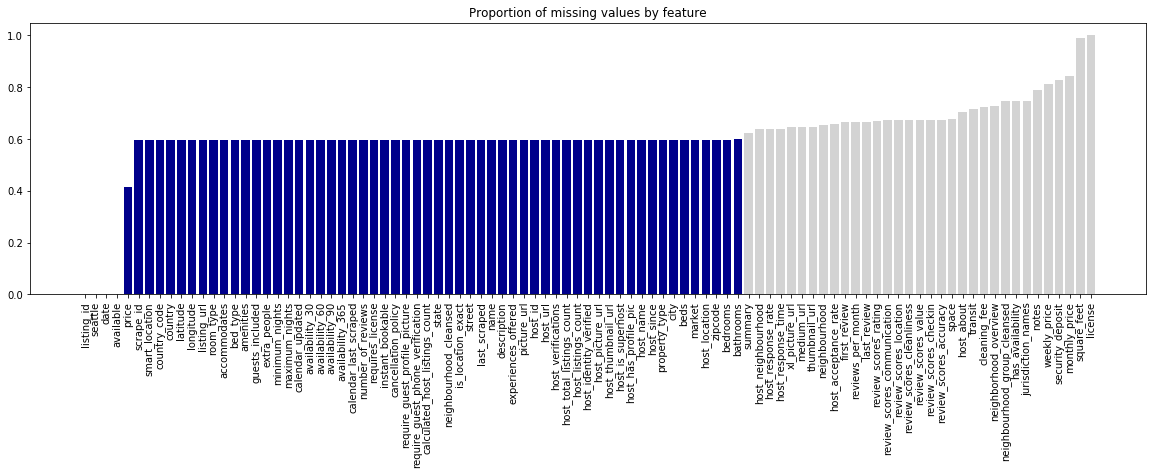

In [35]:
#Visualizing proportion of missing values per feature
start = time.time()

plt.figure(figsize=(20,5))

x = range(mis_df_sort.shape[0])
y = mis_df_sort['missing_proportion']

col = []

for i in y:
    if i <= .6:
        col.append('darkblue')
    else:
        col.append('lightgray')
        plt.bar(x,y)

plt.bar(x,y,color=col)

ax = plt.subplot()
ax.set_xticks(range(mis_df_sort.shape[0]))
ax.set_xticklabels(mis_df_sort['feature'], rotation = 90)
plt.title('Proportion of missing values by feature')
plt.savefig("Proportion_missing_by_feature.png")

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

In [36]:
#Calculate the number of remaining features if dropping features by proportion of missing values

In [37]:
start = time.time()

#Maximum % missing
threashold = list(range(40,100,5))
remaining_features = []

for i in threashold:
    remaining_features.append(len(df.columns[np.sum(df.isnull())/df.shape[0] < i/100]))
    
threashold_divided = [i/100 for i in threashold]

#Creating dataframe for visualization
df_thr_fea = pd.DataFrame({"threashold":threashold_divided, "number_of_features": remaining_features})

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  3 minute(s) 57.92 second(s)


In [44]:
df_thr_fea

,threashold,number_of_features
0,0.40,4
1,0.45,5
2,0.50,5
3,0.55,5
4,0.60,62
5,0.65,69
6,0.70,82
7,0.75,89
8,0.80,90
9,0.85,93


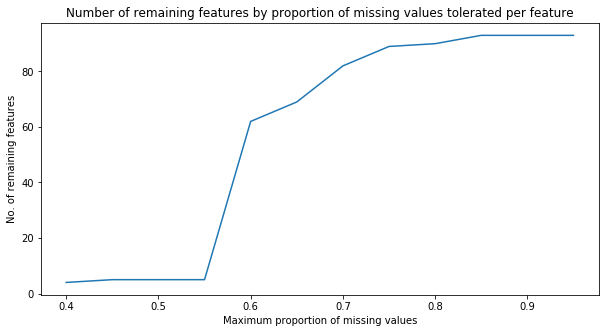

In [45]:
plt.figure(figsize=(10,5))
plt.plot(df_thr_fea['threashold'], df_thr_fea['number_of_features'])
plt.xlabel("Maximum proportion of missing values")
plt.title("Number of remaining features by proportion of missing values tolerated per feature")
plt.ylabel('No. of remaining features')

plt.savefig("threashold_features.png")
plt.show()

>__Assumption:__ <br> more information available makes an accommodation more attractive --> higher prices or better reviews

In [46]:
#Create a feature to count missing values
#df['Missing_values'] = df.apply(lambda x: x.isnull().count(),axis=1) #This approach would require excessive amount of time

In [47]:
start = time.time()

df['missing_values'] = df.isnull().sum(axis=1)

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 19.28 second(s)


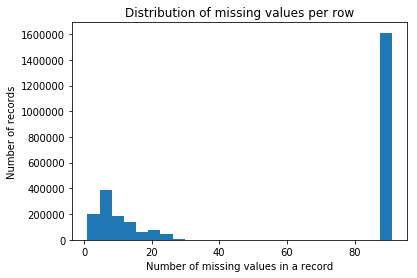

In [48]:
plt.hist(df['missing_values'], bins=25)
plt.xlabel('Number of missing values in a record')
plt.ylabel('Number of records')
plt.title('Distribution of missing values per row')
plt.savefig("missing_values_per_row_histogram.png")

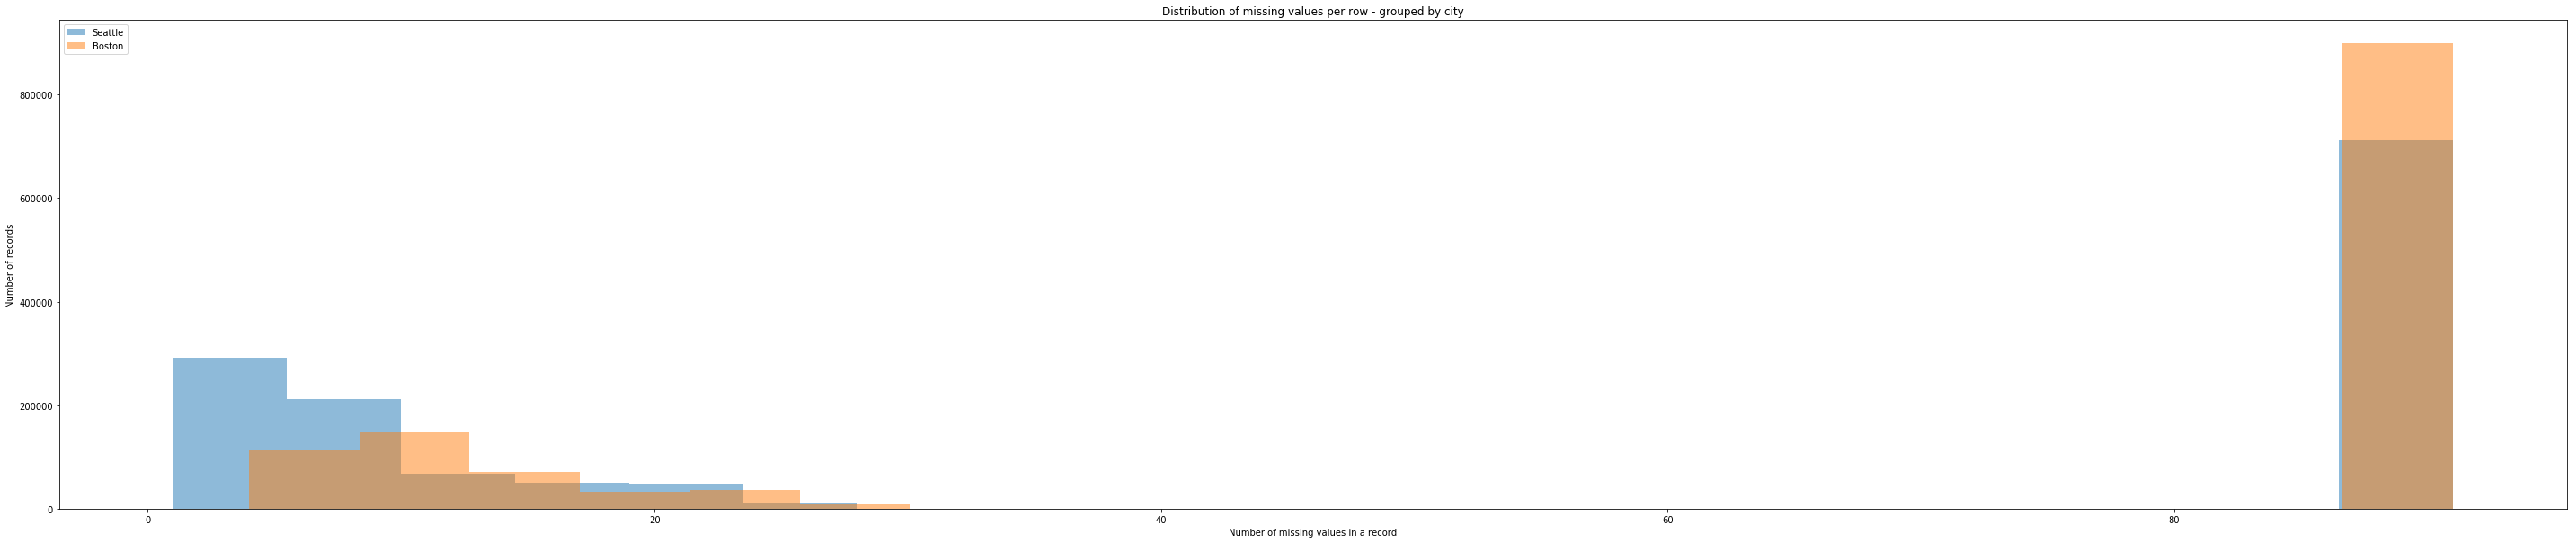

In [43]:
plt.figure(figsize=(50,10))
plt.hist(df['missing_values'][df.seattle == 1], bins=20, alpha = .5, label='Seattle')
plt.hist(df['missing_values'][df.seattle == 0], bins=20, alpha = .5, label='Boston')
plt.xlabel('Number of missing values in a record')
plt.ylabel('Number of records')
plt.legend(loc='upper left')
plt.title('Distribution of missing values per row - grouped by city')
plt.savefig("missing_per_record_by_city.png")

In [49]:
df.missing_values.describe()

count    2.704024e+06
mean     5.793407e+01
std      3.994611e+01
min      1.000000e+00
25%      1.000000e+01
50%      9.000000e+01
75%      9.100000e+01
max      9.100000e+01
Name: missing_values, dtype: float64

#### Investigating missing values <br>
(missing at random, missing completely at random, missing not at random)

In [50]:
def clean_price(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))    
    return(x)

In [51]:
df['price'] = df['price'].apply(clean_price).astype('float')

In [52]:
df.to_csv('merged_price.csv')

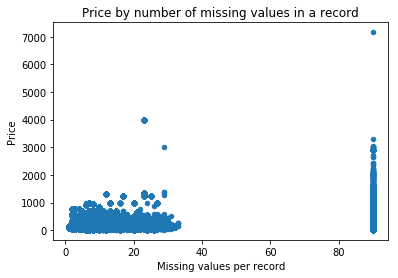

In [53]:
df.plot(x = 'missing_values', y = 'price', kind = 'scatter')
plt.title('Price by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('Price')
plt.savefig("price_by_missing_values_per_record.png")

>__Comment:__<br>
    Based on a simple visual approach, and disregarding seemingly outlier values, there is no clear correlation between the number of missing values of a record and the corresponding price level. However, there might be more relatively expensive accommodations among the ones with the most missing values.

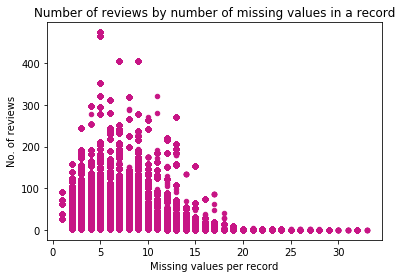

In [54]:
df.plot(x = 'missing_values', y = 'number_of_reviews', kind = 'scatter', color = 'mediumvioletred')
plt.title('Number of reviews by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('No. of reviews')
plt.savefig("no_of_reviews_by_missing_values_per_record.png")

>__Comment:__<br>
    It might occur that accommodations for which less information is available online are less popular, assuming that number of reviews is a valid proxy for popularity.

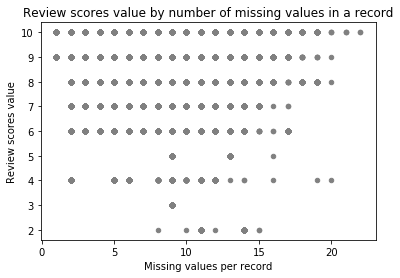

In [55]:
df.plot(x = 'missing_values', y = 'review_scores_value', kind = 'scatter', color = 'grey')
plt.title('Review scores value by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('Review scores value')
plt.savefig("review_scores_value_by_missing_values_per_record.png")

>__Comment:__<br>
    There are seemingly no review scores values available in the dataset for records where are more than cca. 25 missing values in a record.

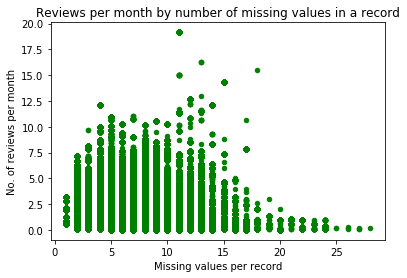

In [56]:
df.plot(x = 'missing_values', y = 'reviews_per_month', kind = 'scatter', color = 'green')
plt.title('Reviews per month by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('No. of reviews per month')
plt.savefig("no_of_reviews_per_month_by_missing_values_per_record.png")

>__Comment:__<br>
    - There is seemingly no data available on reviews per month for records (accommodations) in which more than cca. 30 values are missing.
    - Interestingly, not those records receive the most review per month which have the least missing values.

In [57]:
#Drop columns which contain the most missing values
most_missing60 = df.columns[np.sum(df.isnull())/df.shape[0] >= .6]
len(most_missing60)

33

In [58]:
df = df.drop(columns = most_missing60)
df.shape

(2704024, 63)

In [59]:
#Sorted list of columns which remain in the dataframe
df.columns.sort_values()

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'available', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'country', 'country_code', 'date', 'description',
       'experiences_offered', 'extra_people', 'guests_included',
       'host_has_profile_pic', 'host_id', 'host_identity_verified',
       'host_is_superhost', 'host_listings_count', 'host_location',
       'host_name', 'host_picture_url', 'host_since', 'host_thumbnail_url',
       'host_total_listings_count', 'host_url', 'host_verifications',
       'instant_bookable', 'is_location_exact', 'last_scraped', 'latitude',
       'listing_id', 'listing_url', 'longitude', 'market', 'maximum_nights',
       'minimum_nights', 'missing_values', 'name', 'neighbourhood_cleansed',
       'number_of_reviews', 'picture_url', 'price', 'property_ty

In [60]:
#Drop columns which do not add value to the current dataset but potentially contain several missing values
df = df.drop(['street', 'market', 'city', 'state', 'country', 'country_code', 'smart_location'], axis = 1)
df.shape

(2704024, 56)

### Data analysis

In [61]:
df_num = df.select_dtypes(include='number')
df_num.shape

(2704024, 23)

In [62]:
df_num.columns.sort_values()

Index(['accommodates', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'guests_included', 'host_id',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'listing_id', 'longitude', 'maximum_nights', 'minimum_nights',
       'missing_values', 'number_of_reviews', 'price', 'scrape_id', 'seattle'],
      dtype='object')

In [63]:
#Drop unnecessary IDs for plotting
df_num_plo = df_num.drop(columns = ['host_id', 'listing_id', 'scrape_id'])
df_num.shape

(2704024, 23)

#### Heatmaps of correlation matrix w/o missing data

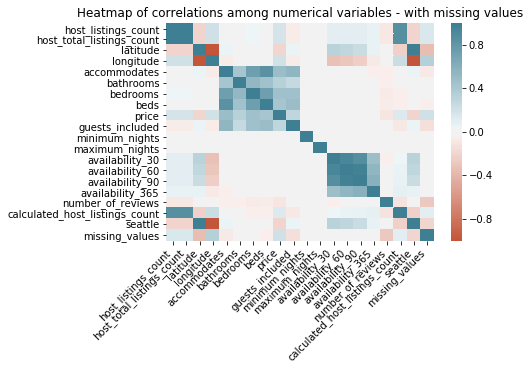

In [64]:
#Heatmap of correlation matrix with missing values
ax = sns.heatmap(df_num_plo.corr(), cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Heatmap of correlations among numerical variables - with missing values')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

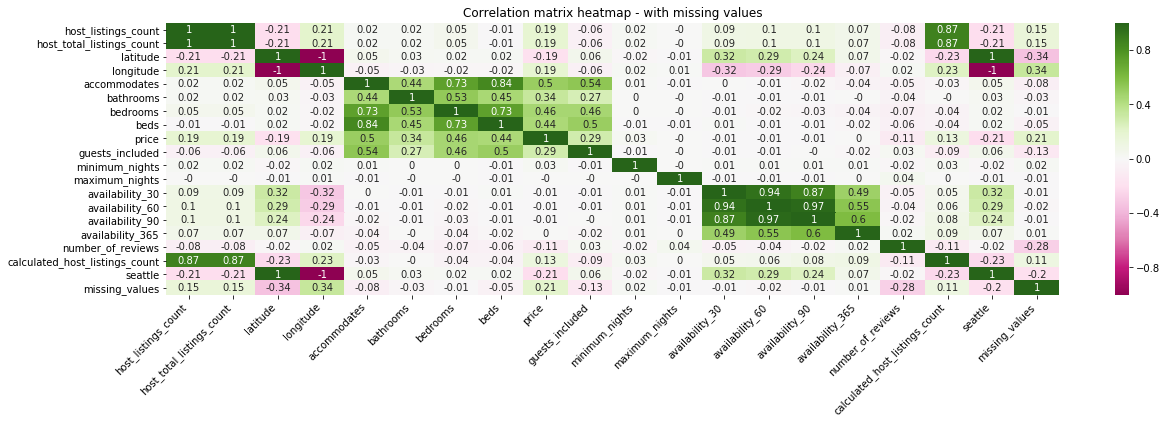

In [65]:
plt.figure(figsize=(20,5))
ax = sns.heatmap(round(df_num_plo.corr(),2), annot = True, cmap='PiYG')
plt.title('Correlation matrix heatmap - with missing values')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("heatmap_mis.png")

In [66]:
df_num_plo_fil = df_num_plo.fillna(df_num_plo.mean())

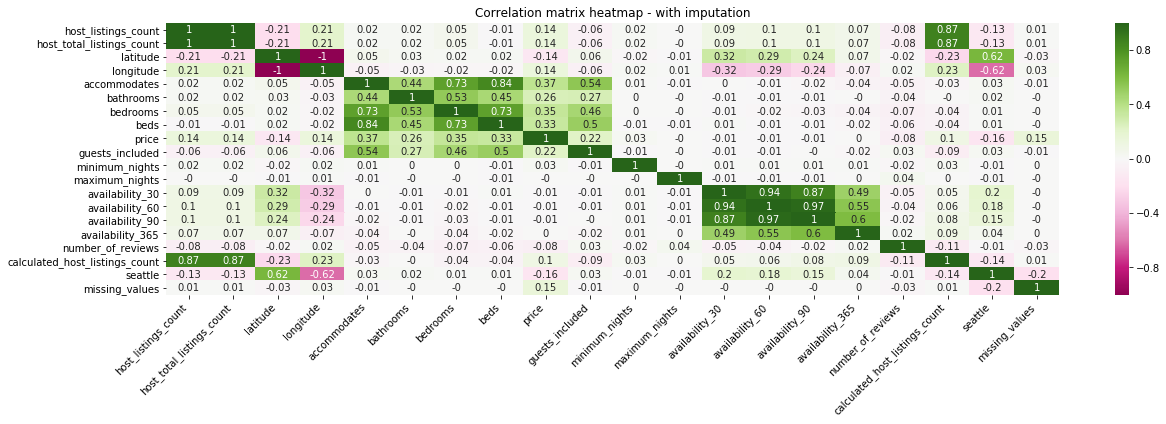

In [67]:
plt.figure(figsize=(20,5))
ax = sns.heatmap(round(df_num_plo_fil.corr(),2), annot = True, cmap='PiYG')
plt.title('Correlation matrix heatmap - with imputation')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("heatmap_filled.png")

In [68]:
#Select numeric features for pairwise investigation
df_num_sel = df_num[['accommodates', 'bathrooms', 'beds', 'availability_30', 'number_of_reviews', 'price', 'seattle']]

In [69]:
df_num_sel2 = df_num[['accommodates', 'bathrooms', 'beds', 'seattle']]

In [70]:
df_num_sel2.shape

(2704024, 4)

In [71]:
df_num_sel2.head(3)

,accommodates,bathrooms,beds,seattle
0,4.0,1.0,1.0,1
1,4.0,1.0,1.0,1
2,4.0,1.0,1.0,1


In [72]:
lf = lambda x: 'Seattle' if x == 1 else 'Boston'

In [73]:
df_num_sel['city'] = df_num_sel.seattle.apply(lf)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
# sns.pairplot(df_num_sel, hue = "city") #script took excessive amount of time to run

In [75]:
#Convert most IDs into object type
df[['listing_id', 'scrape_id']] = df[['listing_id', 'scrape_id']].astype('str')

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 44.,  4.,  1.]),
 array([0.4  , 0.402, 0.404, 0.406, 0.408, 0.41 , 0.412, 0.414, 0.416,
        0.418, 0.42 , 0.422, 0.424, 0.426, 0.428, 0.43 , 0.432, 0.434,
        0.436, 0.438, 0.44 , 0.442, 0.444, 0.446, 0.448, 0.45 , 0.452,
        0.454, 0.456, 0.458, 0.46 , 0.462, 0.464, 0.466, 0.468, 0.47 ,
        0.472, 0.474, 0.476, 0.478, 0.48 , 0.482, 0.484, 0.486, 0.488,
        0.49 , 0.492, 0.494, 0.496, 0.498, 0.5  , 0.502, 0.504, 0.506,
        

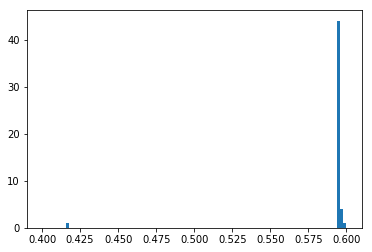

In [76]:
#Check missing data in the remaining dataset
plt.hist(np.sum(df.isnull())/df.shape[0], range=(0.4,0.6), bins=100)

#### Drop rows

In [77]:
#Drop rows with more than 40 missing values

In [78]:
df = df[df['missing_values']<40]
df.shape

(1093485, 56)

In [79]:
df.to_csv('halved.csv')

Text(0, 0.5, 'Number of rows having approximately the same number of missing attributes')

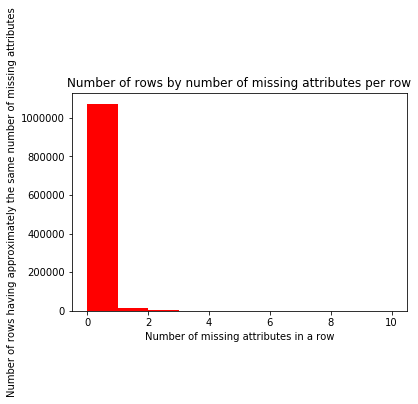

In [80]:
plt.hist(df.isnull().sum(axis=1), color = 'red')
plt.title('Number of rows by number of missing attributes per row')
plt.xlabel('Number of missing attributes in a row')
plt.ylabel('Number of rows having approximately the same number of missing attributes')

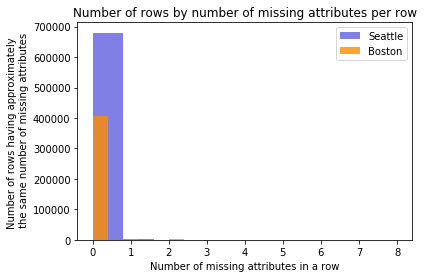

In [101]:
plt.hist(df[df.seattle == 1].isnull().sum(axis=1), color = 'mediumblue', alpha = .5)
plt.hist(df[df.seattle == 0].isnull().sum(axis=1), color = 'darkorange', alpha = .8)
plt.title('Number of rows by number of missing attributes per row')
plt.xlabel('Number of missing attributes in a row')
plt.ylabel('Number of rows having approximately \n the same number of missing attributes')
plt.legend(['Seattle', 'Boston'])

#### Handling missing numeric values

In [82]:
#Assess number of missing values by numeric variable
df.select_dtypes(include='number').isnull().sum()

host_id                              0
host_listings_count                 71
host_total_listings_count           71
latitude                             0
longitude                            0
accommodates                         0
bathrooms                         6517
bedrooms                          3979
beds                              2025
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
calculated_host_listings_count       0
seattle                              0
missing_values                       0
dtype: int64

In [83]:
col_to_fil = [
    'host_listings_count',
    'host_total_listings_count',
    'bathrooms',
    'bedrooms',
    'beds'
]

In [84]:
for i in col_to_fil:
    df[i] = df[i].fillna(df[i].mean())

In [85]:
df.select_dtypes(include='number').isnull().sum()

host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
calculated_host_listings_count    0
seattle                           0
missing_values                    0
dtype: int64

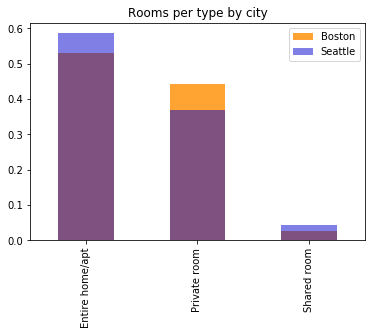

In [88]:
room_type_val_b = df[df.seattle == 0].room_type.value_counts()
room_type_val_s = df[df.seattle == 1].room_type.value_counts()


(room_type_val_b/df[df.seattle == 0].shape[0]).plot(kind="bar", color='darkorange', alpha = .8);
(room_type_val_s/df[df.seattle == 1].shape[0]).plot(kind="bar", color='mediumblue', alpha = .5);
plt.legend(['Boston', 'Seattle'])
plt.title("Rooms per type by city");
plt.savefig('rooms_per_type_by_city.png')

In [89]:
#Number of unique hosts by city
print ('----------------- \n Number of unique hosts by city:')
df.groupby('seattle')['host_id'].nunique()

----------------- 
 Number of unique hosts by city:


seattle
0    2181
1    2751
Name: host_id, dtype: int64

In [90]:
df.columns.sort_values()

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'available', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'date', 'description', 'experiences_offered', 'extra_people',
       'guests_included', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_location', 'host_name', 'host_picture_url', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'instant_bookable', 'is_location_exact',
       'last_scraped', 'latitude', 'listing_id', 'listing_url', 'longitude',
       'maximum_nights', 'minimum_nights', 'missing_values', 'name',
       'neighbourhood_cleansed', 'number_of_reviews', 'picture_url', 'price',
       'property_type', 'require_guest_phone_verification',
    

In [91]:
#Number of unique locations by city
print ('----------------- \n Number of unique listings by city:')
df.groupby('seattle')['listing_id'].nunique()

----------------- 
 Number of unique listings by city:


seattle
0    3585
1    3818
Name: listing_id, dtype: int64

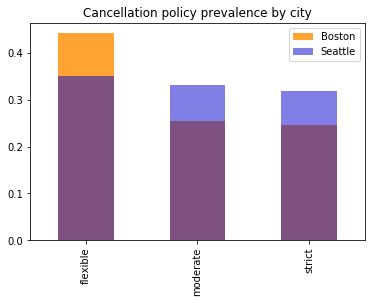

In [94]:
cancellation_pol_b = df[df.seattle == 0].cancellation_policy.value_counts()
cancellation_pol_s = df[df.seattle == 1].cancellation_policy.value_counts()


(cancellation_pol_b/df[df.seattle == 0].shape[0]).plot(kind="bar", color='darkorange', alpha = .8);
(cancellation_pol_s/df[df.seattle == 1].shape[0]).plot(kind="bar", color='mediumblue', alpha = .5);
plt.legend(['Boston', 'Seattle'])
plt.title("Cancellation policy prevalence by city");
plt.savefig('cancellation_policy_by_city.png')

In [ ]:
df.groupby(df['room_type'])

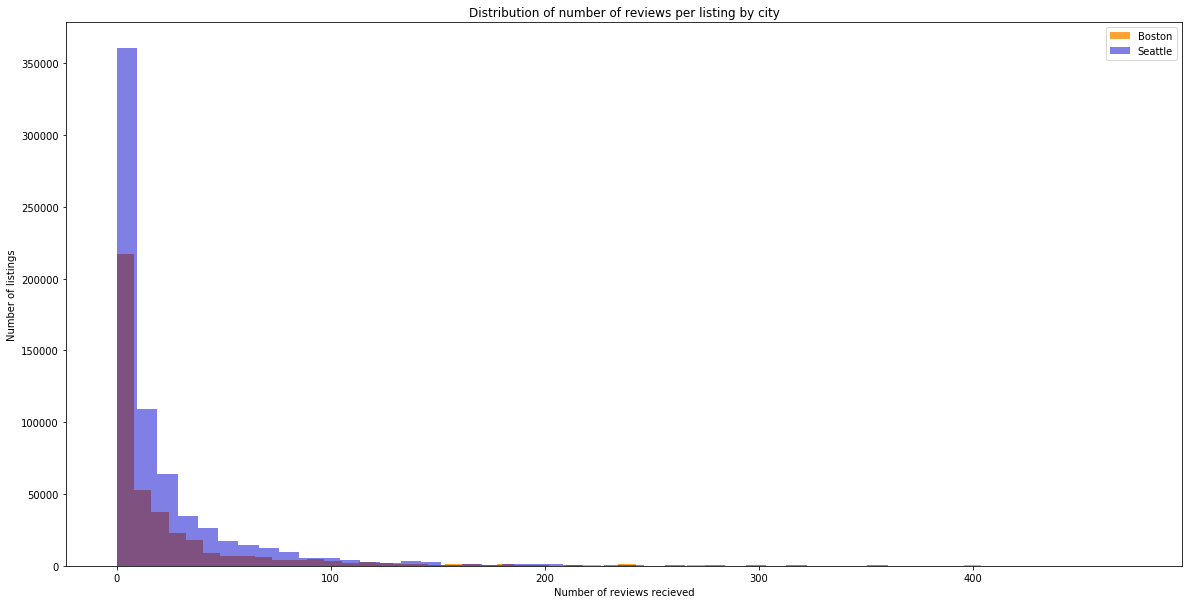

In [95]:
#Distribution of number of reviews received
plt.figure(figsize=(20,10))
plt.hist(df['number_of_reviews'][df['seattle'] == 0], color='darkorange', alpha = .8, bins = 50)
plt.hist(df['number_of_reviews'][df['seattle'] == 1], color='mediumblue', alpha = .5, bins = 50)
plt.legend(['Boston', 'Seattle'])
plt.title("Distribution of number of reviews per listing by city");
plt.xlabel('Number of reviews recieved')
plt.ylabel('Number of listings')
plt.savefig('no_of_reviews_by_city.png')

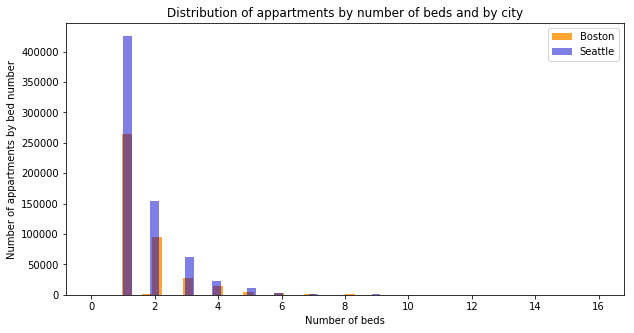

In [96]:
#Distribution of appartments by number of beds
plt.figure(figsize=(10,5))
plt.hist(df['beds'][df['seattle'] == 0], color='darkorange', alpha = .8, bins = 50)
plt.hist(df['beds'][df['seattle'] == 1], color='mediumblue', alpha = .5, bins = 50)
plt.legend(['Boston', 'Seattle'])
plt.title("Distribution of appartments by number of beds and by city");
plt.xlabel('Number of beds')
plt.ylabel('Number of appartments by bed number')
plt.savefig('no_of_beds_by_city.png')

In [97]:
df_obj_uni = pd.DataFrame(df.select_dtypes(include='object').nunique())

In [98]:
object_columns = df.select_dtypes(include='object').columns.sort_values()

In [99]:
object_columns

Index(['amenities', 'available', 'bed_type', 'calendar_last_scraped',
       'calendar_updated', 'cancellation_policy', 'date', 'description',
       'experiences_offered', 'extra_people', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_location',
       'host_name', 'host_picture_url', 'host_since', 'host_thumbnail_url',
       'host_url', 'host_verifications', 'instant_bookable',
       'is_location_exact', 'last_scraped', 'listing_id', 'listing_url',
       'name', 'neighbourhood_cleansed', 'picture_url', 'property_type',
       'require_guest_phone_verification', 'require_guest_profile_picture',
       'requires_license', 'room_type', 'scrape_id', 'zipcode'],
      dtype='object')

In [100]:
end_full = time.time()

t = end_full - start_full

print('------------ \n Time spent on running the full script: \n ', int(t/60), 'minutes', round(t%60,2), 'seconds')

------------ 
 Time spent on running the full script: 
  306 minutes 34.85 seconds
